# Unsupervised Learning Challenge 

For my Unsupervised Learning Capstone project, I chose to use th COVID-19 Symptoms Checker Data set from Bilal H. Hungund K. 

Description of the Dataset: 
"The dataset contains seven major variables that will be having an impact on whether someone has coronavirus disease or not, the description of each variable are as follows:

    +Country: List of countries person visited.
    +Age: Classification of the age group for each person, based on WHO Age Group Standard
    +Symptoms: According to WHO, 5 are major symptoms of COVID-19, Fever, Tiredness, Difficulty in breathing, Dry 
         cough, and sore throat.
    +Experience any other symptoms: Pains, Nasal Congestion, Runny Nose, Diarrhea and Other.
    +Severity: The level of severity, Mild, Moderate, Severe
    +Contact: Has the person contacted some other COVID-19 Patient

With all these categorical variables, a combination for each label in the variable will be generated and therefore, in total 316800 combinations are created."


In this notebook, my work is ordered as follows: 

* Import data 
* Clean Data
* EDA
* Dimensionality Reduction methods 
    * PCA 
    * t-SNE
    * UMAP
* Clustering techniques 
    * K-means
    * DBSCAN 
    * GMM 

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler , Normalizer
from sklearn import datasets, metrics
import time
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import umap
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

In [21]:
covid_df = pd.read_csv('Cleaned-Data.csv')

# Data Cleaning

In [22]:
covid_df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [23]:
covid_df.shape

(316800, 27)

In [24]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

# EDA - consider dropping unrelevant variables

Looks like a good dataset. Will drop country since it's the only Object variable, it'll help make clustering and evaluation easier. Country at this point is not important because we are just curious about the symptoms. 

In [25]:
covid_df.drop(["Country"],axis=1,inplace=True)

In [26]:
covid_df.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#correlation table to see if any variables should be dropped 

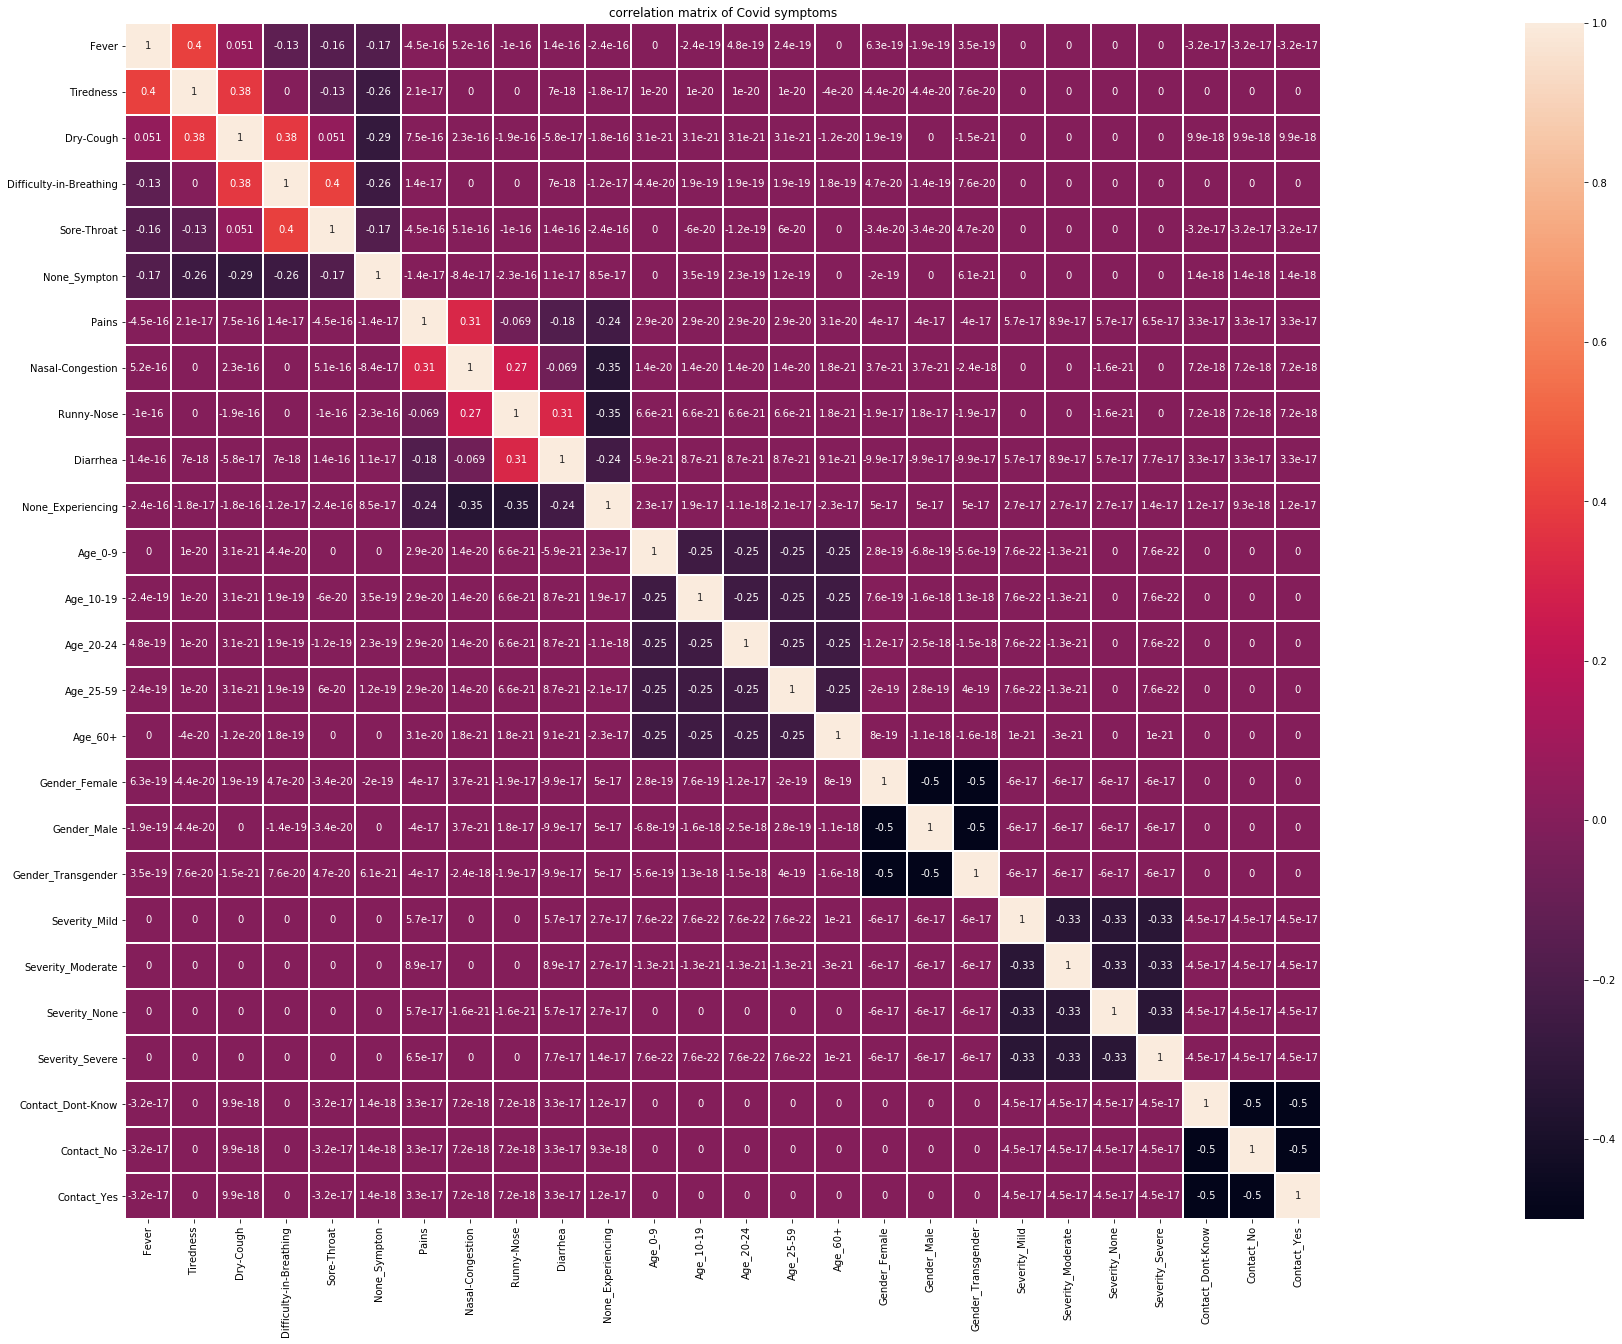

In [27]:
covid_map = covid_df.corr()

#heatmap visual
plt.figure(figsize=(73,22))

plt.subplot(1,1,1)
sns.heatmap(covid_map, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix of Covid symptoms")

plt.show()

Nothing stands out as high correlation. However, we see that the 5 najor symptoms of COVID-19 according to WHO have the highest levels of correlation at 38%-40%

# Dimensionality Reduction methods with Clustering methods

Use Scree Plot to find optimal n_components

In [50]:
#To scale the values along columns.
X = scaler.fit_transform(covid_df)

In [51]:
# Covariance matrix
# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00000316e+00  4.04521194e-01  5.09648800e-02 -1.34840398e-01
  -1.63636880e-01 -1.74078205e-01 -1.07635901e-16  3.19539877e-16
   9.92601393e-17  6.22413739e-17  3.33786382e-18 -5.67729475e-19
   2.09218825e-19  2.09218825e-19  2.09919726e-19 -5.95765499e-20
  -4.40866469e-19  4.33156563e-19  9.81260821e-21 -3.42011450e-17
  -2.37402038e-17 -2.31935013e-17 -5.65696863e-18 -3.73580013e-19
  -6.30810528e-20  3.77505056e-18]
 [ 4.04521194e-01  1.00000316e+00  3.77965666e-01  0.00000000e+00
  -1.34840398e-01 -2.58199705e-01 -3.01821811e-17 -3.34154355e-18
   3.36397237e-18 -6.89700195e-17 -1.69600419e-18 -5.39693452e-19
   8.97503201e-19  8.97503201e-19  8.97853651e-19  7.18247876e-19
  -1.68485988e-17 -3.94607030e-19  3.78135866e-19  1.62889296e-18
  -2.10270176e-19  1.68181096e-18 -1.05135088e-19  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.09648800e-02  3.77965666e-01  1.00000316e+00  3.77965666e-01
   5.09648800e-02 -2.92770946e-01 -8.40779317e-17  2

In [52]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[-2.14059781e-01 -4.28899682e-01 -5.40197403e-01 -4.28899682e-01
 -2.14059781e-01  4.98631840e-01 -6.73555529e-16 -1.94011898e-15
 -1.91045806e-15 -1.06456102e-15  2.30146480e-15  5.45640699e-17
 -1.98792998e-17 -1.91023156e-17 -1.91376336e-17  5.27660814e-17
  6.07392061e-17 -2.34665015e-17 -1.82652647e-17  2.83469827e-17
 -1.69214308e-17  2.96100453e-17 -1.38266285e-17 -1.11814515e-18
 -1.50984748e-18  3.66322098e-18]
Eigenvalue 1: 1.910823317506238
----------------------------------------
Eigenvector 2: 
[-5.36185409e-01 -4.60982871e-01 -8.98806071e-16  4.60982871e-01
  5.36185409e-01  1.47077422e-15 -5.63528918e-16 -5.93376523e-16
  6.13430403e-17  3.35524218e-16  1.78220659e-16 -1.54653779e-16
  6.83577026e-17  6.82508041e-17  6.82509771e-17 -1.56715936e-16
 -8.93047790e-17  5.62222022e-17  1.86734573e-17 -2.68440354e-17
 -4.00989105e-19 -1.15350817e-17  3.61443811e-17  2.08192875e-17
  2.09959648e-17 -4.69373194e-17]
Eigenvalue 2: 1.6273536164368119
--------------

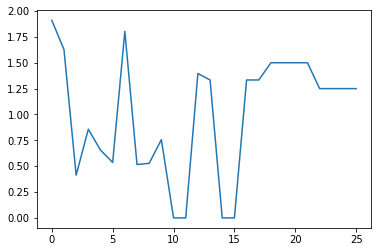

[ 1.91082332e+00  1.62735362e+00  4.12873160e-01  8.57102760e-01
  6.55576508e-01  5.36289577e-01  1.80373645e+00  5.15946215e-01
  5.27757631e-01  7.56610910e-01  4.30131898e-16 -1.66629553e-16
  1.39596458e+00  1.33333754e+00 -3.31395663e-16  1.38728068e-16
  1.33333754e+00  1.33333754e+00  1.50000473e+00  1.50000473e+00
  1.50000473e+00  1.50000473e+00  1.25000395e+00  1.25000395e+00
  1.25000395e+00  1.25000395e+00]


In [53]:
# print scree plot
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

# First: PCA

In [31]:
#move somewhere - apply PCA 
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X)

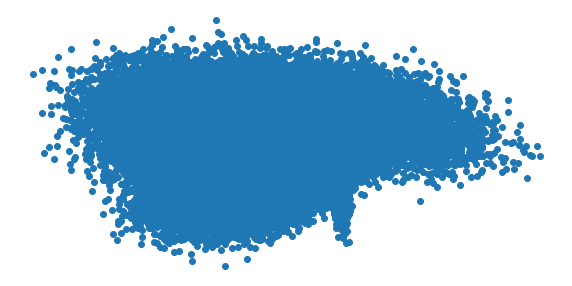

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [12]:
# Apply Clustering Methods 

In [13]:
# Standarizing the features
scaler = StandardScaler()
X_std_PCA = scaler.fit_transform(X)

In [ ]:
#visualize all clustering methods 

# K-means

In [27]:
labels = KMeans(n_clusters=2, random_state=123).fit_predict(X_std_PCA)
print("The silhouette score of the DBSCAN solution: {}".format(metrics.silhouette_score(X_std_PCA, labels, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.06660403873302845


# DBSCAN 

In [14]:
dbscan_cluster = DBSCAN(eps=3, min_samples=5)
# Fit model
clusters = dbscan_cluster.fit_predict(X_std_PCA)

In [15]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std_PCA, clusters, metric='euclidean')))
#revisit DBSCAN, could be negative but dig further into it

The silhouette score of the DBSCAN solution: -0.30658021251352946


# GMM 

In [16]:
gmm_cluster = GaussianMixture(n_components=2, random_state=123)
# Fit model
clusters = gmm_cluster.fit_predict(X_std_PCA)

In [17]:
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std_PCA, clusters, metric='euclidean')))

The silhoutte score of the GMM solution: 0.0640633854512342


# Second t-SNE

In [18]:
# Standarizing the features
scaler = StandardScaler()
X_std_tsne = scaler.fit_transform(X)

In [19]:
#apply t-SNE
#can visualize t-sne to determine n_components 
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.271s...
[t-SNE] Computed neighbors for 100000 samples in 1102.114s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional pro

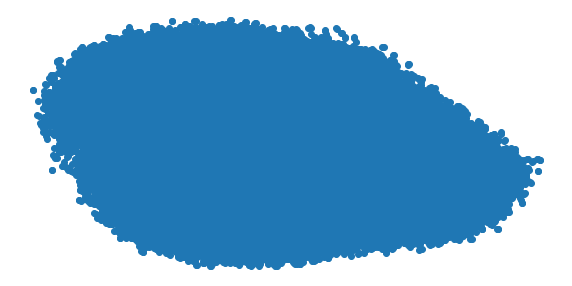

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [21]:
# Apply Clustering Methods

# K-means

In [22]:
labels = KMeans(n_clusters=2, random_state=123).fit_predict(X_std_tsne)
print("The silhouette score of the DBSCAN solution: {}".format(metrics.silhouette_score(X_std_tsne, labels, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.06660403873302845


# DBSCAN

In [23]:
dbscan_cluster = DBSCAN(eps=3, min_samples=5)
# Fit model
clusters = dbscan_cluster.fit_predict(X_std_tsne)

In [24]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std_tsne, clusters, metric='euclidean')))

The silhouette score of the DBSCAN solution: -0.30658021251352946


# GMM

In [25]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std_tsne)

In [26]:
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std_tsne, clusters, metric='euclidean')))

The silhoutte score of the GMM solution: 0.0640633854512342


# Third: UMAP

In [27]:
map_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

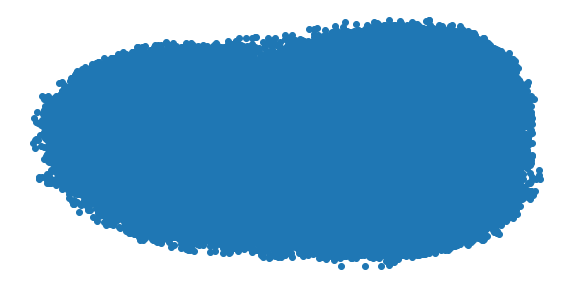

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(map_results[:, 0], map_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [29]:
# Standarizing the features
scaler = StandardScaler()
X_std_umap = scaler.fit_transform(X)

# K-means

In [30]:
labels = KMeans(n_clusters=2, random_state=123).fit_predict(X_std_umap)
print("The silhouette score of the DBSCAN solution: {}".format(metrics.silhouette_score(X_std_umap, labels, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.06660297077150248


# DBSCAN 

In [31]:
dbscan_cluster = DBSCAN(eps=3, min_samples=5)
# Fit model
clusters = dbscan_cluster.fit_predict(X_std_umap)

In [32]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std_umap, clusters, metric='euclidean')))

The silhouette score of the DBSCAN solution: -0.30658021251352946


# GMM

In [33]:
gmm_cluster = GaussianMixture(n_components=2, random_state=123)
# Fit model
clusters = gmm_cluster.fit_predict(X_std_umap)

In [34]:
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std_umap, clusters, metric='euclidean')))

The silhoutte score of the GMM solution: 0.0640664947376298


The best result shows up on K-means clustering technique on all dimensionality reduction techniques at roughly 0.066

Use: The silhouette coefficient is useful for situations where you want to compare the solutions of different clustering algorithms and you don't have a ground truth. Silhouette coefficients can be compared across algorithms, creating a one-number index to represent a clustering solution and compare it against others.